In [1]:
# QUESTION 1
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

# This next command is specifically for Jupyter Notebook
%matplotlib notebook


#import datasetttttt
#d = np.loadtxt("C:\\Git_NEWWWWWWWWW\\StructEst_W19\\ProblemSets\\PS3\\data\\usincmoms.txt", delimiter='\t')

pts = np.loadtxt('C:\\Git_NEWWWWWWWWW\\StructEst_W19\\ProblemSets\\PS3\\data\\usincmoms.txt')
d=pd.read_csv('C:\\Git_NEWWWWWWWWW\\StructEst_W19\\ProblemSets\\PS3\\data\\usincmoms.csv', names=['perc', 'midpoint'])
d_df = pd.DataFrame(d)
d_df

,perc,midpoint
0,0.035190,2500
1,0.041062,7500
2,0.058859,12500
3,0.056836,17500
4,0.058595,22500
5,0.054433,27500
6,0.055060,32500
7,0.050675,37500
8,0.047859,42500
9,0.040839,47500


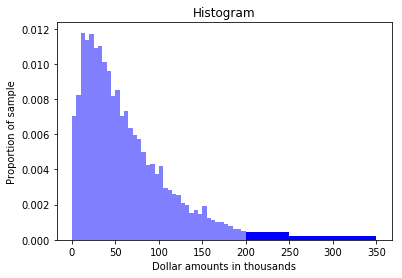

In [8]:
#PART A: histogram

a=np.array(d_df.iloc[0:40,1])
b=np.array(d_df.iloc[0:40,0])

a
b

th=1000*np.ones_like(a)
five=5*np.ones_like(a)

a_th=a/th
b_f = b/five #becausse the width of each bar is 5 so my histogram surface will not sum to 1!

#the first 40 bars
plt.bar(a_th , b_f , width=5, bottom=None, align='center', alpha=0.5, color = 'b')

#generate adjustment for height
h1=np.array(d_df.iloc[41,0])/50
h2=np.array(d_df.iloc[41,0])/100

#the 41st bar
plt.bar([225], [h1], width=50, bottom=None, align='center',color = 'b')  #the next 1 bar (larger width x10)

#the 42nd bar
plt.bar([300], [h2], width=100, bottom=None, align='center', color = 'b')  #the next 1 bar (larger width x20)

plt.xlabel('Dollar amounts in thousands')
plt.ylabel('Proportion of sample')

plt.title('Histogram')

plt.show()

In [3]:
#PART B: GMM logormal
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.stats as sts
bound_u = np.append(np.array(pts[:40,1]/1000+2.5),[250,350])  #generating boundaries for integration (CDF)
bound_l = np.append(np.array(pts[:40,1]/1000-2.5),[200,250])  #also have to append 200,250,100, 350 whose difference is bigger

#generating model moments by subtracting cdf vakues for the 42x2 boundaries
def model_moments(mu,sigma):
    cdf_u = sts.lognorm.cdf(bound_u, sigma, scale = np.exp(mu))
    cdf_l = sts.lognorm.cdf(bound_l, sigma, scale = np.exp(mu))
    return cdf_u-cdf_l

def err_vec(xvals, mu, sigma):
    data = xvals
    model = model_moments(mu,sigma)
    err_vec = data - model
    return err_vec

def criterion(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma)
    crit_val = err.T @ W @ err
    return crit_val


#setting the data moments Mean & Std as initial values for mu and std

mu_data=np.log(pts[:,1].mean())
sigma_data=np.log(pts[:,1].std())

mu_init = 2
sig_init = 2
params_init = np.array([mu_init, sig_init])
W = np.diag(pts[:,0])   #setting the weight matrix to be equal to the data moments (%of data)
gmm_args = (pts[:,0], W)

result = opt.minimize(criterion, params_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((None,None),(1e-10,None)))
mu_GMM1, sig_GMM1 = result.x


pdf = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(pts[:,0], mu_GMM1, sig_GMM1)

print(result)
print('Mean of points =', mu_data, ', STD of points =', sigma_data)
print('Error vector=', err1)
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
    

      fun: 3.5245161294406805e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.62754635e-06,  8.48515594e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 7
   status: 0
  success: True
        x: array([3.95418467, 1.02663677])
Mean of points = 11.587458516832795 , STD of points = 11.106638572208
Error vector= [ 2.40017674e-02 -1.58530509e-03  2.83695301e-04 -6.01142930e-03
 -3.07015650e-03 -3.71048653e-03  1.30098002e-03  1.46168003e-03
  3.02886903e-03  8.89487302e-05  5.67438312e-03  1.44693053e-03
  5.98136015e-03  3.77825539e-03  4.31536843e-03  5.22729065e-03
  3.75041242e-03  1.62791277e-03  3.44133085e-03  2.03409210e-03
  5.60008997e-03  5.19945034e-04  1.17747941e-03  8.62207523e-04
  1.49246195e-03 -4.42339588e-05  2.90515707e-04 -1.46851156e-03
  6.96753803e-05 -5.15261517e-04  2.24886874e-03 -8.00651524e-04
 -7.24046574e-04 -1.04429287e-03 -6.18596952e-04 -9.96823517e-04
 -1.25978555e-03 -1.768647

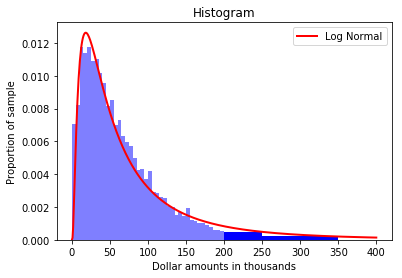

In [23]:
#HISTOGRAM AND THE LOGNORMAL DISTRIBUTION
#Histogram of the data

c=np.array(d_df.iloc[0:40,1])
d=np.array(d_df.iloc[0:40,0])

th=1000*np.ones_like(a)
five=5*np.ones_like(a)

c_th=a/th
d_f=b/five

#the first 40 bars
plt.bar(c_th , d_f , width=5, bottom=None, align='center', alpha=0.5, color='b')

#generate adjustment for height
f1=np.array(d_df.iloc[41,0])/50
f2=np.array(d_df.iloc[41,0])/100

#the 41st bar
plt.bar([225], [f1], width=50, bottom=None, align='center', color='b')  #the next 1 bar (larger width x10)

#the 42nd bar
plt.bar([300], [f2], width=100, bottom=None, align='center', color='b')  #the next 1 bar (larger width x20)

plt.xlabel('Dollar amounts in thousands')
plt.ylabel('Proportion of sample')

plt.title('Histogram')

# Plot the estimated GMM PDF

#WHY IS THIS NOT WORKING???????????????
#have to divide by tens and thousands because the histogram of the actual data is rescaled by 1000
#linspace from 0 to 400
dist_pts = np.linspace(0, 400, 500)
#need to multiply the density by 5 because the with of each bar of the histogram is 
plt.plot(dist_pts, sts.lognorm.pdf(dist_pts, sig_GMM1, scale = np.exp(mu_GMM1)), color = 'r', linewidth = 2, label = 'Log Normal')
plt.legend(loc = 'upper right')



plt.show()


In [5]:
#PART C
def model_moments2(alpha,beta):
    cdf_ga_u = sts.gamma.cdf(bound_u, alpha, scale = beta)
    cdf_ga_l = sts.gamma.cdf(bound_l, alpha, scale = beta)
    return cdf_ga_u-cdf_ga_l

def err_vec2(xvals, alpha, beta):
    data = xvals
    model = model_moments2(alpha, beta)
    err_vec = data - model
    return err_vec

def criterion2(params, *args):
    alpha, beta = params
    xvals, W = args
    err = err_vec2(xvals, alpha, beta)
    crit_val = err.T @ W @ err
    return crit_val

alpha2_init = 3
beta2_init = 20  #since my x's are rescaled by /1000,I ned to divide the initial alpha by 1000 := 20
params2_init = np.array([alpha2_init, beta2_init])
W = np.diag(pts[:,0])
gmm_args = (pts[:,0], W)

result2 = opt.minimize(criterion2, params2_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)))
alpha_gmm2, beta_gmm2= result2.x
print(result2)
print('Error vector Gamma=', err_vec2)
print('alpha_GA_GMM=', alpha_gmm2, 'beta_GA_GMM=', beta_gmm2)

      fun: 1.5004047223188368e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.30362524e-07, -1.63697045e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 14
   status: 0
  success: True
        x: array([ 1.50501893, 41.12426958])
Error vector Gamma= <function err_vec2 at 0x0000020CFF41F378>
alpha_GA_GMM= 1.5050189283629074 beta_GA_GMM= 41.12426957564341


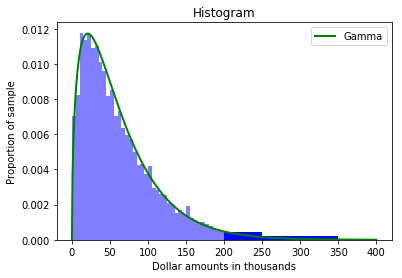

In [9]:
#HISTOGRAM AND THE GAMMA DISTRIBUTION

#Histogram of the data

m=np.array(d_df.iloc[0:40,1])
l=np.array(d_df.iloc[0:40,0])

th=1000*np.ones_like(a)
five=5*np.ones_like(a)

m_th=a/th
l_f=b/five

#the first 40 bars
plt.bar(m_th , l_f , width=5, bottom=None, align='center', alpha=0.5, color='b')

#generate adjustment for height
h1=np.array(d_df.iloc[41,0])/(5*10)
h2=np.array(d_df.iloc[41,0])/(5*20)

#the 41st bar
plt.bar([225], [h1], width=50, bottom=None, align='center', color='b')  #the next 1 bar (larger width x10)

#the 42nd bar
plt.bar([300], [h2], width=100, bottom=None, align='center', color='b')  #the next 1 bar (larger width x20)

plt.xlabel('Dollar amounts in thousands')
plt.ylabel('Proportion of sample')

plt.title('Histogram')

# Plot the estimated GMM PDF
# have to divide by tens and thousands because the histogram of the actual data is rescaled by 1000
#lispace from 0 to 400
dist_pts = np.linspace(0, 400, 500)
plt.plot(dist_pts, sts.gamma.pdf(dist_pts, alpha_gmm2, scale =beta_gmm2), color = 'g', linewidth = 2, label = 'Gamma')
plt.legend(loc = 'upper right')

plt.show()


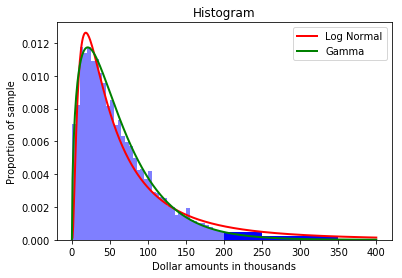

In [11]:
#PART D 
#HISTOGRAM AND TWO DISTRIBUTIONS COMBINED

y=np.array(d_df.iloc[0:40,1])
z=np.array(d_df.iloc[0:40,0])

th=1000*np.ones_like(a)
five=5*np.ones_like(a)

y_th=a/th
z_f=b/five

#the first 40 bars
plt.bar(y_th , z_f , width=5, bottom=None, align='center', alpha=0.5, color='b')

#generate adjustment for height
f1=np.array(d_df.iloc[41,0])/50
f2=np.array(d_df.iloc[41,0])/100

#the 41st bar
plt.bar([225], [f1], width=50, bottom=None, align='center', color='b')  #the next 1 bar (larger width x10)
#the 42nd bar
plt.bar([300], [f2], width=100, bottom=None, align='center', color='b')  #the next 1 bar (larger width x20)

plt.xlabel('Dollar amounts in thousands')
plt.ylabel('Proportion of sample')

plt.title('Histogram')

# Plot the estimated GMM PDF
#have to divide by tens and thousands because the histogram of the actual data is rescaled by 1000
#linspace from 0 to 400
dist_pts = np.linspace(0, 400, 500)
#need to multiply the density by 5 because the with of each bar of the histogram is 
plt.plot(dist_pts, sts.lognorm.pdf(dist_pts, sig_GMM1, scale = np.exp(mu_GMM1)), color = 'r', linewidth = 2, label = 'Log Normal')
plt.legend(loc = 'upper right')

dist_pts = np.linspace(0, 400, 500)
plt.plot(dist_pts, sts.gamma.pdf(dist_pts, alpha_gmm2, scale =beta_gmm2), color = 'g', linewidth = 2, label = 'Gamma')
plt.legend(loc = 'upper right')

plt.show()


It seems that the Gamma distribution provides a better fit, both by visual inspection, as well as by the value of the criterion function, which is lower for the gamma fit.

In [21]:
#PART E: Gamma estimation with two-step estimator for the optimal weighting matrix

#CANNOT DO IT WITH THIS DATA


In [17]:
# 2. BROCK AND MIRMAN (1972) GMM ESTIMATION

pts2 = np.loadtxt('C:\\Git_NEWWWWWWWWW\\StructEst_W19\\ProblemSets\\PS3\\data\\MacroSeries.txt', delimiter = ',')

def z_1(alpha, xvals):
    z = np.log(xvals[:,3]/(alpha*xvals[:,1]**(alpha-1)))
    return z

#Moment Conditions
def data_moment2(alpha, rho, mu, xvals):
    z = z_1(alpha, xvals)
    z_t = z[1:100]
    z_t_1 = z[0:99]
    k_t = xvals[:,1][1:100] 
    c_t = xvals[:,0][1:100]
    c_t_1 = xvals[:,0][0:99]
    w_t_1 = xvals[:,2][0:99]
    mom1 = (z_t - rho*z_t_1 - (1-rho)*mu).mean()
    mom2 = ((z_t - rho*z_t_1 - (1-rho)*mu)*z_t).mean()
    mom3 = (0.99*alpha*np.exp(z_t)*k_t**(alpha-1)*c_t/c_t_1 - 1).mean()
    mom4 = ((0.99*alpha*np.exp(z_t)*k_t**(alpha-1)*c_t/c_t_1 - 1)*w_t_1).mean()    
    return mom1, mom2, mom3, mom4

def err_vec2(alpha, rho, mu, xvals):
    mom1, mom2, mom3, mom4 = data_moment2(alpha, rho, mu, xvals)
    err_vec = np.array([mom1, mom2, mom3, mom4])
    return err_vec.T

def criterion2(params, *args):
    alpha, rho, mu = params
    xvals,W = args
    err = err_vec2(alpha, rho, mu, xvals)
    crit_val = err.T @ W @ err
    return crit_val


# 0.5 0.3 0.7
#Initial Values
alpha_init2 = 0.7
rho_init2 = 0.5
mu_init2 = 5

#Identity Matrix
W = np.eye(4)
params_2 = np.array([alpha_init2, rho_init2, mu_init2])
gmm2_arg= (pts2,W)
result_2 = opt.minimize(criterion2, params_2, args = gmm2_arg, method = 'L-BFGS-B', bounds = ((1e-10, 1-1e-10),(-1+1e-10, 1-1e-10),(1e-10, None)))
alpha_gmm2, rho_gmm2, mu_gmm2 = result_2.x

#Result
print(result_2)
#Estimated Values
print('alpha_GMM =', alpha_gmm2, 'rho_GMM =',rho_gmm2, 'mu_GMM =',mu_gmm2)
#Minimized Criterion Function
print('Minimized Criterion Function =', result_2.fun)


#results depend heavily on the initial values I put - I would expect to see someting like the saddle pattern in the 3-D graph that we saw in class

#also, the value of the 1st element in the Jacobian is not zero, meaning that it has not found the minimiser 
#(changing methods doesn't help...)

#min criterion function also seems pretty big

      fun: 29098546159.161102
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3051.7578125,     0.       ,     0.       ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 28
      nit: 1
   status: 0
  success: True
        x: array([0.70118975, 0.5       , 5.        ])
alpha_GMM = 0.7011897502822038 rho_GMM = 0.5 mu_GMM = 5.0
Minimized Criterion Function = 29098546159.161102
